In [1340]:
import networkx as nx
import folium
from folium import FeatureGroup
import spaghetti
import osmnx as ox
import pandas as pd
import geopandas as gpd
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import folium
from shapely.geometry import box
import pyproj
import spaghetti as spgh
import osmnx as ox
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
from geopy.distance import distance
from shapely.geometry import Point
from geopy.distance import distance
from math import cos, radians
import folium
from folium import FeatureGroup
from collections import defaultdict
import random
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from shapely.geometry import LineString


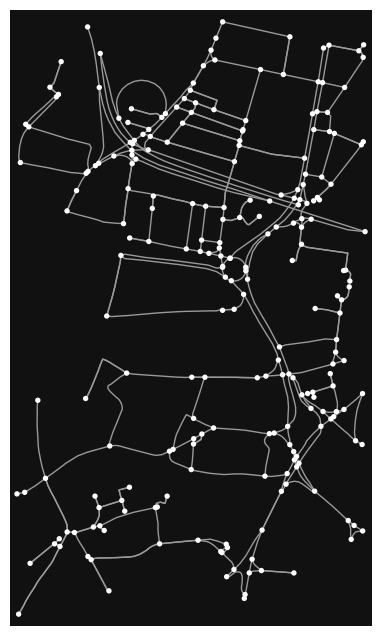

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [1344]:
# Center coordinates of PlayHouse 

latitude = 53.7976355
longitude = -1.537413

# Set up the square area around the center coordinates

side_length_km = 1.18  #
side_length_deg = side_length_km / 100
half_side_length_deg = side_length_deg / 2
lat, lon = latitude, longitude

# Bounding box coordinates

north = lat + half_side_length_deg
south = lat - half_side_length_deg
east = lon + half_side_length_deg
west = lon - half_side_length_deg

# Get road network within the specified square area

leeds_1km = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Plot the graph

ox.plot_graph(leeds_1km)


In [1349]:
# Calculate the network statistics

leeds_1km = leeds_1km.to_undirected()
eccentricities = nx.eccentricity(leeds_1km)
spatial_diameter = max(eccentricities.values())

avg_street_length = ox.stats.basic_stats(leeds_1km, area=None)['street_length_avg']

# Calculate area

gdf_nodes, gdf_edges = ox.graph_to_gdfs(leeds_1km)
area_m2 = gdf_nodes.unary_union.convex_hull.area
area_km2 = area_m2 * 1e-6

basic_stats = ox.basic_stats(leeds_1km, area=area_m2, clean_int_tol=True)
node_density = basic_stats['n'] / area_km2
intersection_density = basic_stats['intersection_count'] / area_km2
edge_density = basic_stats['m'] / area_km2
avg_circuitry = basic_stats['circuity_avg']

# Print the network statistics

print("Network Statistics:")
print(f"Spatial Diameter: {spatial_diameter:.2f} meters")
print(f"Average Street Length: {avg_street_length:.2f} meters")
print(f"Node Density: {node_density:.2f} nodes/sq. km")
print(f"Intersection Density: {intersection_density:.2f} intersections/sq. km")
print(f"Edge Density: {edge_density:.2f} edges/sq. km")
print(f"Average Circuitry: {avg_circuitry:.2f}")

# Check if the network is planar

is_planar, _ = planarity.check_planarity(leeds_1km_undirected)
if is_planar:
    print("The network is planar.")
else:
    print("The network is not planar.")


Network Statistics:
Spatial Diameter: 31.00 meters
Average Street Length: 60.24 meters
Node Density: 1853030898523.47 nodes/sq. km
Intersection Density: 1625327949128.64 intersections/sq. km
Edge Density: 2489028791660.76 edges/sq. km
Average Circuitry: 1.03
The network is not planar.


/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/osmnx/simplification.py:424: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/osmnx/simplification.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return _merge_nodes_geometric(G, tolerance).centroid


In [1350]:
northbound = float(north)
southbound = float(south)
eastbound = float(east)
westbound = float(west)

In [1352]:
### LEEDS DATA 
accidents_2019 = gpd.read_file('2019_Leeds.csv')
accidents_2018 = gpd.read_file('2018_Leeds.csv')
accidents_2017 = gpd.read_file('2017_Leeds.csv')
accidents_2016 = gpd.read_file('2016_Leeds.csv')
accidents_2015 = gpd.read_file('2015_Leeds.csv')

In [1353]:
#accidents_2019.head(1)

In [1354]:
#accidents_2018.head(1)

In [1355]:
# Rename the "Accident Fields_Reference Number" column to "Reference Number"
accidents_2018 = accidents_2018.rename(columns={'Accident Fields_Reference Number': 'Reference Number'})


In [1356]:
#accidents_2018.head(1)

In [1357]:
#accidents_2017.head(1)

In [1358]:
#accidents_2016.head(1)

In [1359]:
#accidents_2015.head(1)

In [1360]:
# Concatenate the accident datasets

accidents_all = pd.concat([accidents_2015, accidents_2016, accidents_2017, accidents_2018, accidents_2019], ignore_index=True)

In [1361]:
accidents_all

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,...,Age of Casualty,Type of Vehicle,geometry,Expr1,1st Road Class & No,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Casualty Fields_Reference Number,Casualty Veh No
0,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,...,36,Goods vehicle 3.5 tonnes mgw and under,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21G0539,427798,426248,5,16-Jan-15,1205,A,Snow,Daylight: street lights present,Snowing without high winds,...,27,Goods vehicle 3.5 tonnes mgw and under,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21G1108,431142,430087,1,16-Jan-15,1732,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,...,68,Car,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21H0565,434602,436699,2,17-Jan-15,930,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,49,Car,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21H0638,434254,434318,2,17-Jan-15,1315,A,Wet / Damp,Daylight: street lights present,Fine without high winds,...,33,Car,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11313,6CU0181,442094,434619,1,30/12/2019,0422,1,2,4,4,...,27,9,None,NaN,M1,E08000035,NaN,1,NaN,NaN
11314,6CU0363,423019,437653,1,30/12/2019,1000,3,4,1,1,...,36,5,None,NaN,A65,E08000035,NaN,1,NaN,NaN
11315,6CV0723,436853,442515,2,31/12/2019,1340,3,1,1,1,...,59,1,None,NaN,A58,E08000035,NaN,2,NaN,NaN
11316,6CV1518,421466,433999,3,31/12/2019,1640,3,1,4,1,...,41,9,None,NaN,A647,E08000035,NaN,2,NaN,NaN


### Getting coordinates 

In [1362]:
import pyproj

def transform_coordinates(df):
    # Define the coordinate systems
    grid_ref = pyproj.CRS.from_epsg(27700)  # British National Grid
    wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 (lat/long)

    # Define the transformer
    transformer = pyproj.Transformer.from_crs(grid_ref, wgs84)

    # Transform the Grid Ref: Easting and Northing columns to latitude and longitude
    df['Longitude'], df['Latitude'] = transformer.transform(df['Grid Ref: Easting'].values, df['Grid Ref: Northing'].values)

    return df

In [1363]:
accidents = transform_coordinates(accidents_all)

In [1364]:
accidents[['Longitude','Latitude']]

,Longitude,Latitude
0,53.731890,-1.580117
1,53.731890,-1.580117
2,53.766206,-1.529044
3,53.825414,-1.475817
4,53.804038,-1.481368
...,...,...
11313,53.806170,-1.362291
11314,53.834628,-1.651708
11315,53.877531,-1.440927
11316,53.801853,-1.675559


In [1365]:
# Create a new dataframe with the rounded coordinates

accidents_rounded = accidents.copy()
accidents_rounded[['Longitude', 'Latitude']] = accidents_rounded[['Longitude', 'Latitude']].round(2)

# Group the accidents by rounded coordinates and count the number of accidents in each group

accident_counts = accidents_rounded.groupby(['Longitude', 'Latitude']).size().reset_index(name='count')

# Sort the results in descending order by the count of accidents

accident_counts = accident_counts.sort_values('count', ascending=False)

# Print the first 10 rows of the result

print(accident_counts.head(10))

     Longitude  Latitude  count
243      53.80     -1.54    262
244      53.80     -1.53    261
242      53.80     -1.55    258
281      53.81     -1.52    218
241      53.80     -1.56    167
280      53.81     -1.53    151
315      53.82     -1.52    148
168      53.78     -1.54    140
282      53.81     -1.51    126
166      53.78     -1.56    119


### We can see that there is most accidents between 53.7 53.8 and -1.5 to -1.6 so those are maybe the squares we should inspect 

In [1366]:
# Filter the accidents dataframe to only include rows within the boundaries

accidents_within_bounds = accidents[(accidents['Latitude'] >= westbound) & 
                                     (accidents['Latitude'] <= eastbound) & 
                                     (accidents['Longitude'] >= southbound) & 
                                     (accidents['Longitude'] <= northbound)]

# Count the number of rows in the filtered dataframe

num_rows = len(accidents_within_bounds)

print(f"There are {num_rows} accidents within the specified boundaries.")


There are 378 accidents within the specified boundaries.


In [1367]:
accidents_gdf = gpd.GeoDataFrame(accidents_within_bounds, 
                                 geometry=gpd.points_from_xy(accidents_within_bounds["Longitude"], 
                                                             accidents_within_bounds["Latitude"]))

In [1368]:
accidents_gdf.reset_index(drop=True, inplace=True)


In [1371]:
accidents_gdf

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,...,geometry,Expr1,1st Road Class & No,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Casualty Fields_Reference Number,Casualty Veh No,Longitude,Latitude
0,21M1029,430429,433884,2,22-Jan-15,1410,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,POINT (53.80037 -1.53949),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800374,-1.539487
1,2130207,430334,433342,1,03-Jan-15,410,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,...,POINT (53.79551 -1.54098),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.795508,-1.540983
2,2211177,430236,433914,2,01-Feb-15,2150,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,POINT (53.80065 -1.54241),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800655,-1.542414
3,2260181,430849,433188,2,06-Feb-15,650,A,Wet / Damp,Daylight: street lights present,Fine without high winds,...,POINT (53.79409 -1.53318),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.794094,-1.533180
4,22A1555,430864,434191,2,10-Feb-15,2035,A,Dry,Darkness: street lights present and lit,Fine without high winds,...,POINT (53.80311 -1.53285),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.803108,-1.532852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,6BJ0638,430811,433259,1,19/11/2019,1159,3,1,1,1,...,POINT (53.79473 -1.53375),NaN,A61,E08000035,NaN,1,NaN,NaN,53.794734,-1.533750
374,6C31401,430951,433242,2,03/12/2019,1800,6,1,4,1,...,POINT (53.79457 -1.53163),NaN,U,E08000035,NaN,2,NaN,NaN,53.794573,-1.531626
375,6CB1299,430690,433675,2,11/12/2019,1700,3,1,4,1,...,POINT (53.79848 -1.53555),NaN,A61,E08000035,NaN,2,NaN,NaN,53.798480,-1.535545
376,6CG1041,430242,432968,2,16/12/2019,1420,6,2,1,8,...,POINT (53.79215 -1.54242),NaN,U,E08000035,NaN,2,NaN,NaN,53.792152,-1.542416


In [1372]:
leeds_accidents = gpd.GeoDataFrame(accidents_gdf, geometry='geometry')['geometry']


In [1373]:
leeds_accidents

0      POINT (53.80037 -1.53949)
1      POINT (53.79551 -1.54098)
2      POINT (53.80065 -1.54241)
3      POINT (53.79409 -1.53318)
4      POINT (53.80311 -1.53285)
                 ...            
373    POINT (53.79473 -1.53375)
374    POINT (53.79457 -1.53163)
375    POINT (53.79848 -1.53555)
376    POINT (53.79215 -1.54242)
377    POINT (53.80001 -1.53439)
Name: geometry, Length: 378, dtype: geometry

In [1374]:
accidents_gdf['Latitude'] = accidents_gdf['geometry'].apply(lambda point: point.y)
accidents_gdf['Longitude'] = accidents_gdf['geometry'].apply(lambda point: point.x)

In [1375]:
accidents_gdf

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,...,geometry,Expr1,1st Road Class & No,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Casualty Fields_Reference Number,Casualty Veh No,Longitude,Latitude
0,21M1029,430429,433884,2,22-Jan-15,1410,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,POINT (53.80037 -1.53949),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800374,-1.539487
1,2130207,430334,433342,1,03-Jan-15,410,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,...,POINT (53.79551 -1.54098),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.795508,-1.540983
2,2211177,430236,433914,2,01-Feb-15,2150,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,POINT (53.80065 -1.54241),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800655,-1.542414
3,2260181,430849,433188,2,06-Feb-15,650,A,Wet / Damp,Daylight: street lights present,Fine without high winds,...,POINT (53.79409 -1.53318),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.794094,-1.533180
4,22A1555,430864,434191,2,10-Feb-15,2035,A,Dry,Darkness: street lights present and lit,Fine without high winds,...,POINT (53.80311 -1.53285),NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.803108,-1.532852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,6BJ0638,430811,433259,1,19/11/2019,1159,3,1,1,1,...,POINT (53.79473 -1.53375),NaN,A61,E08000035,NaN,1,NaN,NaN,53.794734,-1.533750
374,6C31401,430951,433242,2,03/12/2019,1800,6,1,4,1,...,POINT (53.79457 -1.53163),NaN,U,E08000035,NaN,2,NaN,NaN,53.794573,-1.531626
375,6CB1299,430690,433675,2,11/12/2019,1700,3,1,4,1,...,POINT (53.79848 -1.53555),NaN,A61,E08000035,NaN,2,NaN,NaN,53.798480,-1.535545
376,6CG1041,430242,432968,2,16/12/2019,1420,6,2,1,8,...,POINT (53.79215 -1.54242),NaN,U,E08000035,NaN,2,NaN,NaN,53.792152,-1.542416


In [1376]:
accidents_gdf = accidents_gdf.merge(accidents_grouped, on=['Latitude', 'Longitude'])

In [1377]:
accidents_gdf = accidents_gdf.merge(accidents_grouped, on=['Latitude', 'Longitude'])


In [1378]:
# Sum the count_x and count_y columns and assign the result to the 'count' column
accidents_gdf['count'] = accidents_gdf['count_x']

# Drop the unnecessary 'count_x' and 'count_y' columns
accidents_gdf.drop(['count_x', 'count_y'], axis=1, inplace=True)

In [1380]:
def plot_accidents_on_network(graph, accidents_gdf):
    
    # Create a folium map with the road network
    
    map_folium = ox.plot_graph_folium(graph)

    # Create a folium FeatureGroup to add accident markers
    
    accidents_feature_group = FeatureGroup(name="Accidents")

    # Counter for the number of accident markers
    
    accident_markers_count = 0

    # Add a CircleMarker for each accident location to the FeatureGroup with radius proportional to the count
    
    for _, row in accidents_gdf.iterrows():
        folium.CircleMarker(
            location=[row["Longitude"], row["Latitude"]],
            radius=row["count"],  # Use 'count' column here
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.5,
        ).add_to(accidents_feature_group)
        accident_markers_count += 1

    print("Number of accident markers:", accident_markers_count)

    # Add the FeatureGroup with the accident markers to the folium map
    
    map_folium.add_child(accidents_feature_group)

    # Add a layer control to allow toggling the accidents layer on and off
    
    folium.LayerControl().add_to(map_folium)

    return map_folium


In [1381]:
map_with_accidents = plot_accidents_on_network(leeds_1km, accidents_gdf)


Number of accident markers: 378


In [2418]:
map_with_accidents

In [1383]:
# ### 2 

# Investigate whether a high number of accidents on one road correlates with a high number on connecting roads:
    
# To investigate the correlation between accidents on a road and accidents on its connecting roads, you can start by assigning each accident to its nearest road segment in the graph.

In [1384]:
accidents_gdf

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,...,Expr1,1st Road Class & No,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Casualty Fields_Reference Number,Casualty Veh No,Longitude,Latitude,count
0,21M1029,430429,433884,2,22-Jan-15,1410,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800374,-1.539487,1
1,2130207,430334,433342,1,03-Jan-15,410,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.795508,-1.540983,1
2,2211177,430236,433914,2,01-Feb-15,2150,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800655,-1.542414,3
3,2660776,430236,433914,1,06-Jun-15,430,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.800655,-1.542414,3
4,36P0595,430236,433914,1,25/06/2016,1140,Unclassified,Dry,Daylight: street lights present,Fine without high winds,...,Leeds 2016,NaN,NaN,NaN,NaN,NaN,NaN,53.800655,-1.542414,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,6BJ0638,430811,433259,1,19/11/2019,1159,3,1,1,1,...,NaN,A61,E08000035,NaN,1,NaN,NaN,53.794734,-1.533750,1
374,6C31401,430951,433242,2,03/12/2019,1800,6,1,4,1,...,NaN,U,E08000035,NaN,2,NaN,NaN,53.794573,-1.531626,1
375,6CB1299,430690,433675,2,11/12/2019,1700,3,1,4,1,...,NaN,A61,E08000035,NaN,2,NaN,NaN,53.798480,-1.535545,1
376,6CG1041,430242,432968,2,16/12/2019,1420,6,2,1,8,...,NaN,U,E08000035,NaN,2,NaN,NaN,53.792152,-1.542416,1


In [1385]:
# Some edges (roads in Soho) are missing a geometry, so we will create one
# assuming that the road is a direct line from start point to end point.
# First, we need to get the locations of the points

x_values = nx.get_node_attributes(leeds_1km, 'x')
y_values = nx.get_node_attributes(leeds_1km, 'y')

# We will work with the edges and add the missing geometries (lines denoting the roads between points)

graph_with_geometries = list(leeds_1km.edges(data=True))

# Iterate through the edges and, where missing, add a geometry attribute with the line between start and end nodes

for e in graph_with_geometries:
    if not 'geometry' in e[2]:
        e[2]['geometry'] = LineString([
            Point(x_values[e[0]], y_values[e[0]]),
            Point(x_values[e[1]], y_values[e[1]])])

graph_with_geometries[0:4]

[(611055,
  342626322,
  {'osmid': [4372315, 4326732],
   'bridge': 'yes',
   'lanes': '3',
   'ref': 'A653',
   'name': ['Crown Point Bridge', 'Crown Point Road'],
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'oneway': False,
   'length': 95.579,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f7a0b563590>}),
 (611055,
  317020454,
  {'osmid': 4326736,
   'oneway': True,
   'lanes': '2',
   'ref': 'A653',
   'name': 'Black Bull Street',
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'length': 67.908,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f7a0c35d290>}),
 (611055,
  6047609609,
  {'osmid': [779194461, 80868671],
   'oneway': True,
   'lanes': '2',
   'ref': 'A653',
   'name': 'Crown Point Road',
   'highway': 'secondary',
   'maxspeed': '30 mph',
   'length': 107.15,
   'geometry': <shapely.geometry.linestring.LineString at 0x7f7a0b583d10>}),
 (611057,
  6047609602,
  {'osmid': 229127796,
   'oneway': True,
   'lanes': '4',
   'ref'

In [1386]:
# We will now drop the start and end nodes, as we will construct a new Spaghetti network based on the geometries of the roads

road_lines = [x[2] for x in graph_with_geometries]

# From this, we can construct a GeoDataFrame

roads_geodataframe = GeoDataFrame(pd.DataFrame(road_lines))
roads_geodataframe

,osmid,bridge,lanes,ref,name,highway,maxspeed,oneway,length,geometry,junction,access,tunnel
0,"[4372315, 4326732]",yes,3,A653,"[Crown Point Bridge, Crown Point Road]",secondary,30 mph,False,95.579,"LINESTRING (-1.53436 53.79421, -1.53446 53.794...",NaN,NaN,NaN
1,4326736,NaN,2,A653,Black Bull Street,secondary,30 mph,True,67.908,"LINESTRING (-1.53501 53.79344, -1.53516 53.793...",NaN,NaN,NaN
2,"[779194461, 80868671]",NaN,2,A653,Crown Point Road,secondary,30 mph,True,107.150,"LINESTRING (-1.53595 53.79266, -1.53577 53.792...",NaN,NaN,NaN
3,229127796,NaN,4,A61,East Street,trunk,30 mph,True,17.615,"LINESTRING (-1.53395 53.79500, -1.53408 53.79514)",NaN,NaN,NaN
4,5946791,NaN,2,NaN,East Street,trunk_link,30 mph,True,18.102,"LINESTRING (-1.53392 53.79484, -1.53394 53.794...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,38633315,NaN,2,NaN,Meadow Lane,tertiary,30 mph,False,35.779,"LINESTRING (-1.54156 53.79341, -1.54157 53.793...",NaN,yes,NaN
313,28816460,NaN,NaN,NaN,Dock Street,tertiary_link,NaN,False,16.207,"LINESTRING (-1.54131 53.79340, -1.54139 53.793...",NaN,NaN,NaN
314,503445890,NaN,NaN,NaN,Hunslet Road,residential,NaN,True,60.723,"LINESTRING (-1.54086 53.79292, -1.54093 53.793...",NaN,NaN,NaN
315,236141860,NaN,NaN,NaN,Hunslet Road,residential,NaN,False,10.038,"LINESTRING (-1.54075 53.79286, -1.54082 53.792...",NaN,NaN,NaN


In [1387]:
# From the GeoDataFrame, we can construct a network in Spaghetti from which to do point analysis
leeds1km_points_graph = spaghetti.Network(in_data=roads_geodataframe)

# Check what this new network looks like by getting DataFrames for the edges and plotting them
nodes_df, edges_df = spaghetti.element_as_gdf(
    leeds1km_points_graph, vertices=True, arcs=True)

<AxesSubplot:>

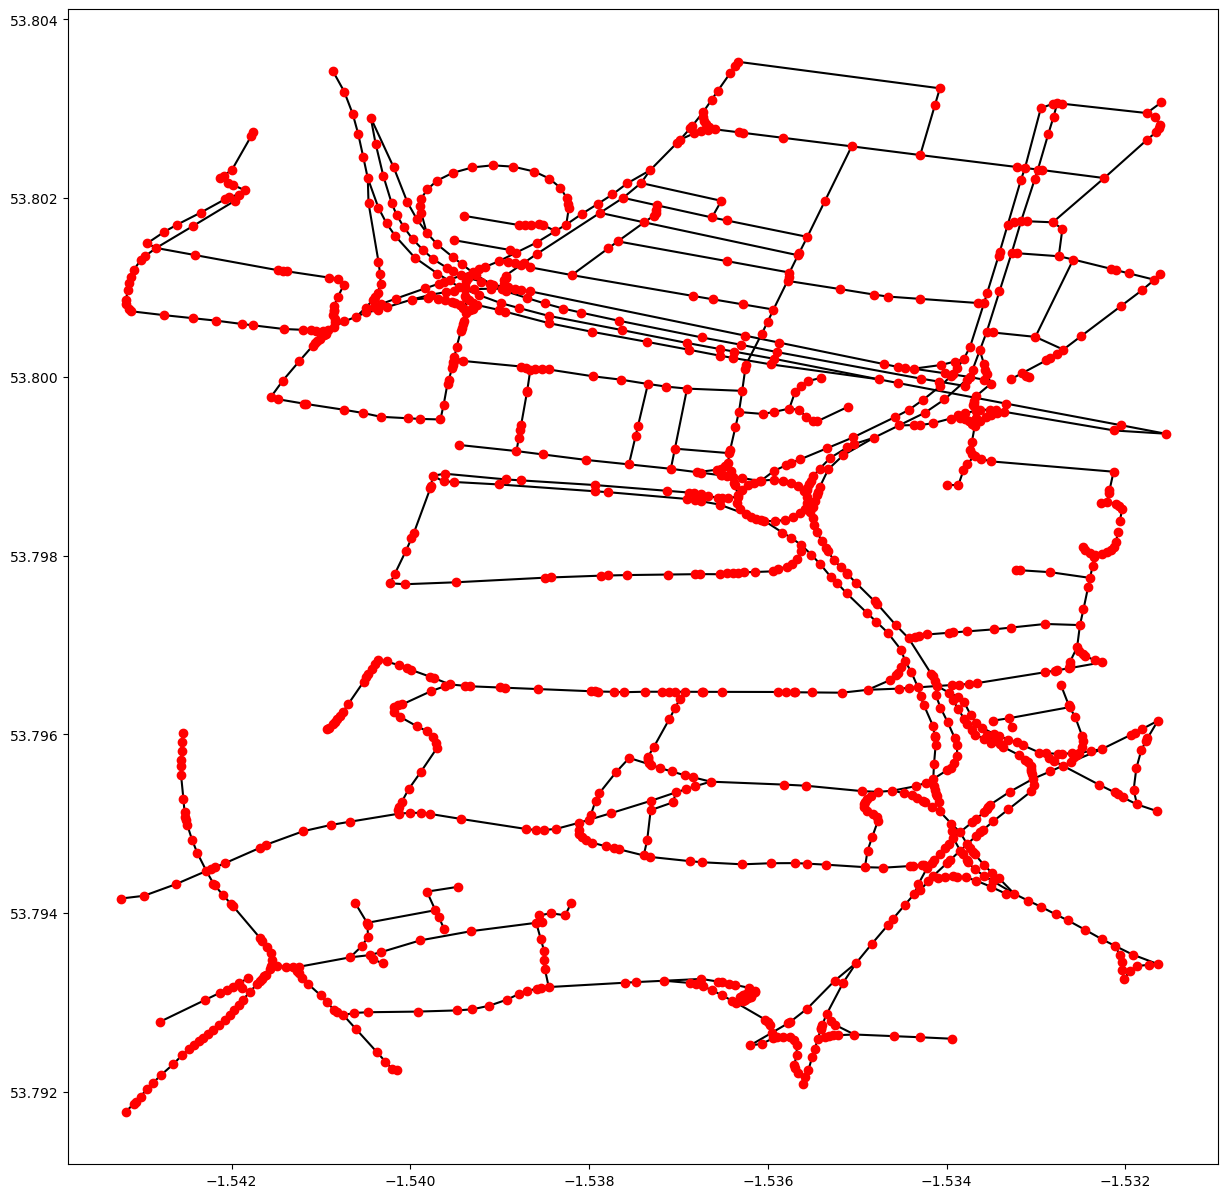

In [1388]:
base_network = edges_df.plot(color = "k", zorder=0, figsize=(15, 15))
nodes_df.plot(ax=base_network, color="r", zorder=2)

In [1389]:
# We will now snap the Soho located crimes we extracted earlier, i.e. position them at the closest point on the closest road

accident_points_lps = [lpsPoint(xy) for xy in zip(accidents_gdf['Latitude'], accidents_gdf['Longitude'])]

leeds1km_points_graph.snapobservations(accident_points_lps, 'accidents')

/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/libpysal/cg/shapes.py:1006: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [1390]:
# We can see the difference between the original crime coordinates and their position when snapped to the road network

print("observation 1\ntrue coords:\t%s\nsnapped coords:\t%s" % (
    leeds1km_points_graph.pointpatterns["accidents"].points[0]["coordinates"],
    leeds1km_points_graph.pointpatterns["accidents"].snapped_coordinates[0]
))

observation 1
true coords:	(-1.539487272524169, 53.80037414822407)
snapped coords:	(-1.5394724972838285, 53.80037023907977)


In [1391]:
import esda 

In [1392]:
# Get snapped point pattern 

pointpat = leeds1km_points_graph.pointpatterns['accidents']
# Get count of points per network edge: a dictionary from each edge to the crime count on that edge

counts = leeds1km_points_graph.count_per_link(pointpat.obs_to_arc, graph=False)

In [1393]:
counts

{(400, 401): 2,
 (85, 86): 3,
 (231, 232): 5,
 (406, 435): 1,
 (203, 977): 4,
 (674, 675): 1,
 (361, 362): 1,
 (335, 336): 1,
 (54, 932): 2,
 (799, 852): 1,
 (939, 1100): 7,
 (217, 218): 3,
 (445, 446): 1,
 (661, 662): 7,
 (8, 813): 1,
 (1005, 1006): 1,
 (535, 536): 2,
 (211, 220): 10,
 (53, 1123): 5,
 (673, 674): 8,
 (24, 402): 6,
 (381, 382): 1,
 (121, 122): 2,
 (935, 936): 3,
 (18, 26): 1,
 (666, 667): 1,
 (104, 105): 3,
 (325, 446): 19,
 (345, 346): 1,
 (937, 938): 11,
 (320, 321): 1,
 (264, 1157): 1,
 (67, 68): 1,
 (684, 685): 5,
 (122, 123): 10,
 (202, 204): 2,
 (668, 669): 3,
 (379, 380): 2,
 (448, 449): 5,
 (285, 286): 1,
 (1125, 1126): 1,
 (669, 670): 1,
 (56, 931): 11,
 (1192, 1193): 2,
 (868, 869): 1,
 (444, 450): 1,
 (259, 260): 1,
 (1091, 1093): 1,
 (820, 830): 2,
 (687, 688): 2,
 (678, 679): 4,
 (336, 337): 1,
 (873, 874): 1,
 (112, 113): 2,
 (295, 296): 1,
 (275, 288): 1,
 (117, 118): 2,
 (110, 680): 3,
 (51, 52): 3,
 (1174, 1175): 1,
 (34, 255): 1,
 (310, 314): 1,
 (627

In [1394]:
# Get the weights matrix for edges in the graph 
# (just the adjacency matrix with 1 where edges connect at a node, 0 otherwise)

weights = leeds1km_points_graph.w_network

In [1395]:
# Get the edges included in the weights matrix: an enumerator for a list of edges

edges = weights.neighbors.keys()

# Construct an array of the counts values per edge in the same order as
# the weights matrix, with 0.0 where no counts recorded

values = [counts[edge] if edge in counts.keys () else 0.     for index, edge in enumerate(edges)]

In [1396]:
moran = esda.moran.Moran(values, weights)
moran.I

0.10741753819731877

In [1397]:
# Get the geometry of each edge

from shapely.geometry import Point, LineString

# Get snapped coordinates of accident points

snapped_coords = leeds1km_points_graph.pointpatterns['accidents'].snapped_coordinates

road_geoms = edges_df.geometry.values

In [1398]:
snapped_coords

{0: (-1.5394724972838285, 53.80037023907977),
 1: (-1.54089, 53.7949854),
 2: (-1.542414587914937, 53.80065410143011),
 3: (-1.542414587914937, 53.80065410143011),
 4: (-1.542414587914937, 53.80065410143011),
 5: (-1.5331441034816602, 53.79416705555934),
 6: (-1.5328306043543087, 53.80304795717205),
 7: (-1.5328306043543087, 53.80304795717205),
 8: (-1.5328306043543087, 53.80304795717205),
 9: (-1.540263828919629, 53.79681514517535),
 10: (-1.5341405581201861, 53.79661768077042),
 11: (-1.5347263632497097, 53.79720310777894),
 12: (-1.5340146745029961, 53.79654645590403),
 13: (-1.5349081283180048, 53.79454586278766),
 14: (-1.5322554, 53.7968064),
 15: (-1.5408105404754973, 53.79964182086935),
 16: (-1.5330793476908373, 53.802007994333316),
 17: (-1.5409339, 53.7960541),
 18: (-1.5359642793979522, 53.79271025502292),
 19: (-1.5351787568290636, 53.79910186139574),
 20: (-1.5387267419603792, 53.8009680827077),
 21: (-1.5415597, 53.7997747),
 22: (-1.5415597, 53.7997747),
 23: (-1.535400

In [1404]:
# Function to calculate distance from point to nearest intersection

def distance_to_nearest_intersection(point, road_geoms):
    distances = [point.distance(geom) for geom in road_geoms]
    return min(distances)

# Function to calculate distance from point to middle of road segment it lies on

def distance_to_road_middle(point, road_geoms):
    distances = [point.distance(geom.interpolate(0.5, normalized=True)) for geom in road_geoms]
    return min(distances)

In [1414]:

# Get snapped coordinates of accident points
snapped_coords = leeds1km_points_graph.pointpatterns['accidents'].snapped_coordinates

road_geoms = edges_df.geometry.values

# Function to find the road segment for a given point
def find_road_segment(point, road_geoms):
    distances = [(i, point.distance(geom)) for i, geom in enumerate(road_geoms)]
    min_distance_index = min(distances, key=lambda x: x[1])[0]
    return road_geoms[min_distance_index]

# Function to calculate distance from point to nearest intersection
def distance_to_nearest_intersection(point, road_geoms):
    road_segment = find_road_segment(point, road_geoms)
    intersections = [geom.intersection(road_segment) for geom in road_geoms if geom != road_segment and geom.intersects(road_segment)]
    if not intersections:
        return None
    nearest_intersection = nearest_points(point, MultiPoint(intersections))[1]
    return point.distance(nearest_intersection)

# Function to calculate distance from point to middle of road segment it lies on
def distance_to_road_middle(point, road_geoms):
    road_segment = find_road_segment(point, road_geoms)
    return point.distance(road_segment.interpolate(0.5, normalized=True))

In [1430]:
# Calculate distance from each snapped point to nearest intersection and to road middle
intersection_distances = [distance_to_nearest_intersection(Point(coords), road_geoms) for coords in snapped_coords.values()]

road_middle_distances = [distance_to_road_middle(Point(coords), road_geoms) for coords in snapped_coords.values()]

# Remove any None values from intersection_distances
intersection_distances = [dist for dist in intersection_distances if dist is not None]

# Print some summary statistics of the distances
print("Distance to nearest intersection:")
print("Mean:", sum(intersection_distances)/len(intersection_distances))
print("Median:", sorted(intersection_distances)[len(intersection_distances)//2])
print("Max:", max(intersection_distances))


Distance to nearest intersection:
Mean: 5.936602006512802e-05
Median: 3.6900386857385375e-05
Max: 0.0006459529781646719


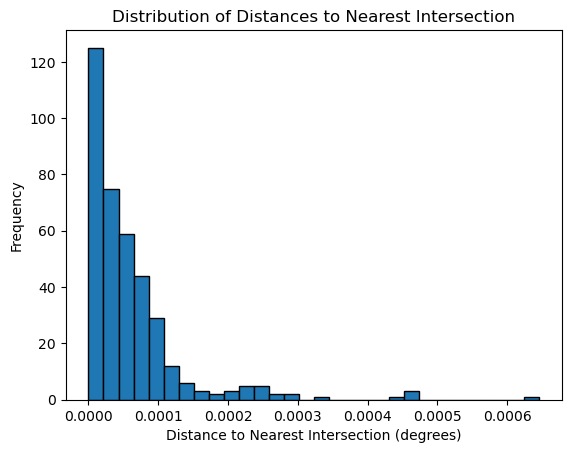

In [1431]:
# Plot the histogram of intersection distances
plt.hist(intersection_distances, bins=30, edgecolor='black')
plt.xlabel('Distance to Nearest Intersection (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Distances to Nearest Intersection')
plt.show()

In [2403]:
# Remove any None values from intersection_distances and road_middle_distances

intersection_distances = [dist for dist in intersection_distances if dist is not None]
road_middle_distances = [dist for dist in road_middle_distances if dist is not None]

# Check if both lists have the same length

assert len(intersection_distances) == len(road_middle_distances)

Distance to nearest intersection / distance to road middle:
Mean: 4.056756774403308
Median: 0.8479888707962464
Max: 187.01775711483774


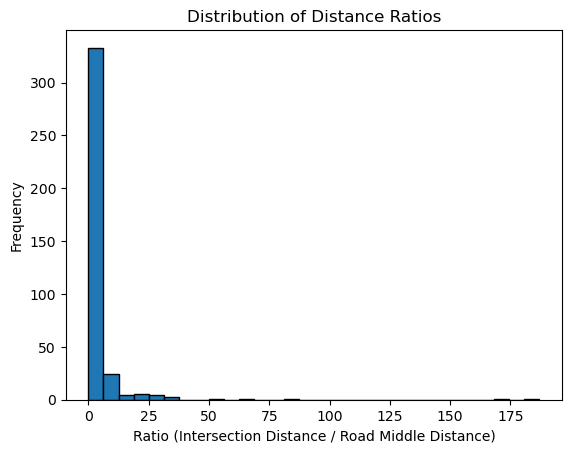

In [2406]:
# Remove any None values from intersection_distances and road_middle_distances
intersection_distances = [dist for dist in intersection_distances if dist is not None]
road_middle_distances = [dist for dist in road_middle_distances if dist is not None]

# Check if both lists have the same length
assert len(intersection_distances) == len(road_middle_distances)

# Calculate the ratio of intersection distance to road middle distance
ratios = [intersection_distances[i] / road_middle_distances[i] for i in range(len(intersection_distances))]

# Remove any NaN values from ratios
ratios = np.array(ratios)
ratios = ratios[~np.isnan(ratios)]

# Print some summary statistics of the ratios
print("Distance to nearest intersection / distance to road middle:")
print("Mean:", np.mean(ratios))
print("Median:", np.median(ratios))
print("Max:", np.max(ratios))

# Plot the histogram of ratios
plt.hist(ratios, bins=30, edgecolor='black')
plt.xlabel('Ratio (Intersection Distance / Road Middle Distance)')
plt.ylabel('Frequency')
plt.title('Distribution of Distance Ratios')
plt.show()


In [2420]:
import osmnx as ox
from scipy.spatial import Voronoi
import numpy as np
import folium

# Download the street network of Leeds

leeds_graph = ox.graph_from_place('Leeds, UK', network_type='all')

# Get the center of the map

center = ox.distance.nearest_nodes(leeds_graph, X=(-1.542553), Y=(53.798224), return_dist=False)
center_coords = leeds_graph.nodes[center]['y'], leeds_graph.nodes[center]['x']

# Create folium map

m = folium.Map(location=center_coords, zoom_start=13, control_scale=True)

# Add the graph edges to the map

ox.plot_graph_folium(leeds_graph, graph_map=m, edge_color="gray", edge_width=1)

# Define seed points

coordinates_dict = {
    1: (53.827307, -1.504659),
    2: (53.8251056, -1.605753),
    3: (53.812617, -1.567939),
    4: (53.811530, -1.523008),
    5: (53.769711, -1.635303),
    6: (53.789609, -1.523027),
    7: (53.776238, -1.545009),
    8: (53.7816663, -1.5956652),
    9: (53.798292, -1.586931),
    10: (53.763863, -1.493146)
}

seeds_arr = np.array(list(coordinates_dict.values()))

# Compute the Voronoi diagram
vor = Voronoi(seeds_arr)

# Add Voronoi diagram to the map
for idx, segment in enumerate(vor.ridge_vertices):
    if -1 not in segment:
        coord1 = vor.vertices[segment[0]][::-1]
        coord2 = vor.vertices[segment[1]][::-1]
        folium.PolyLine([coord1, coord2], color="red", weight=1.5, opacity=1).add_to(m)

# Add seed points as markers to the map
for idx, coord in coordinates_dict.items():
    folium.Marker(location=coord, popup=f'Seed {idx}', icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

# Display the map
#m


/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/osmnx/folium.py:64: UserWarning: `edge_color` has been deprecated and will be removed: use kwargs instead
  warn("`edge_color` has been deprecated and will be removed: use kwargs instead")
/Users/franciszekruszkowski/opt/anaconda3/lib/python3.7/site-packages/osmnx/folium.py:67: UserWarning: `edge_width` has been deprecated and will be removed: use kwargs instead
  warn("`edge_width` has been deprecated and will be removed: use kwargs instead")


In [2233]:
import osmnx as ox
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Download the street network of Leeds
leeds_graph = ox.graph_from_place('Leeds, UK', network_type='all')
leeds_graph = leeds_graph.to_undirected()


# Define seed points
coordinates_dict = {
    1: (53.827307, -1.504659),
    2: (53.8251056, -1.605753),
    3: (53.812617, -1.567939),
    4: (53.811530, -1.523008),
    5: (53.769711, -1.635303),
    6: (53.789609, -1.523027),
    7: (53.776238, -1.545009),
    8: (53.7816663, -1.5956652),
    9: (53.798292, -1.586931),
    10: (53.763863, -1.493146)
}

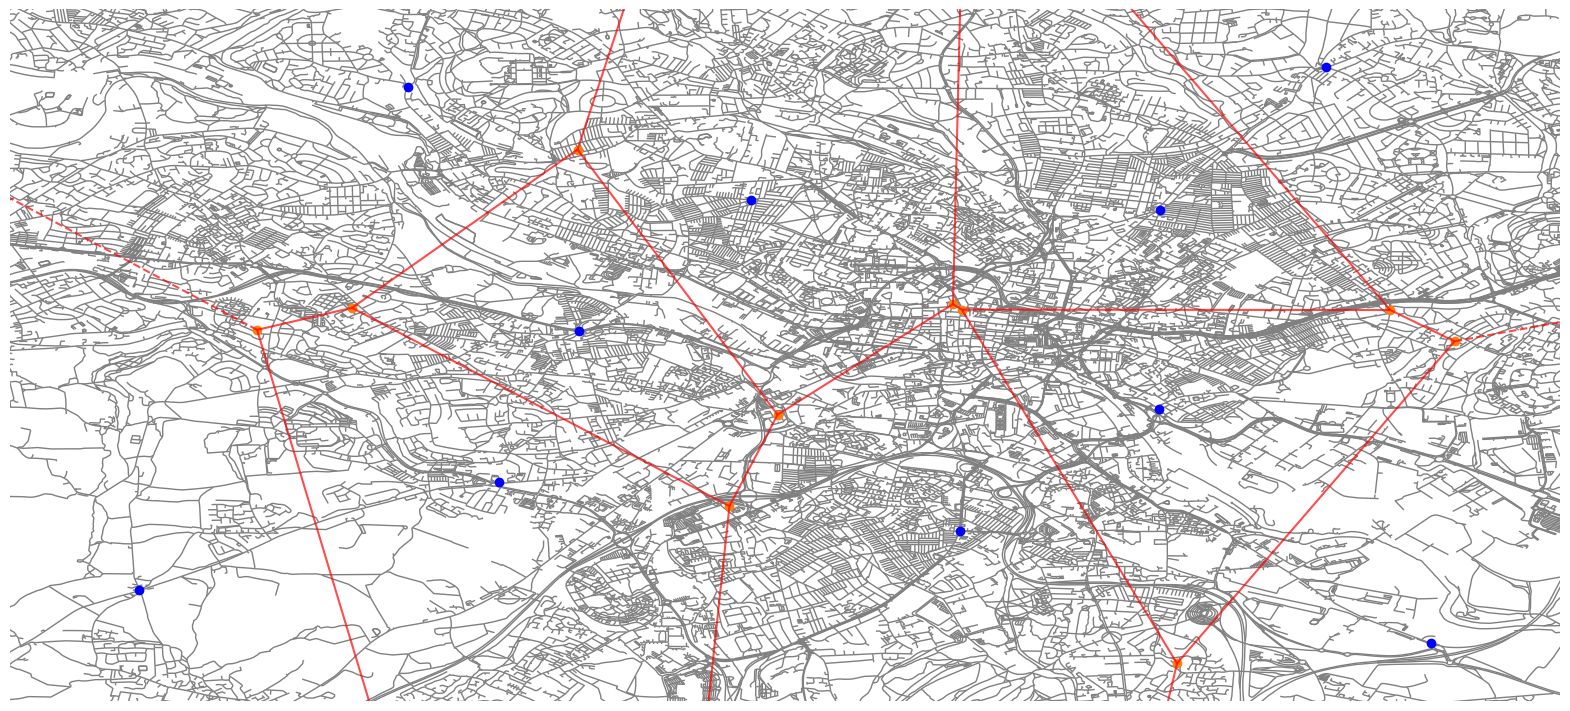

In [2234]:
seeds_arr = np.array(list(coordinates_dict.values()))

# Project the seed points
seed_points = gpd.GeoDataFrame(geometry=[Point(xy[::-1]) for xy in seeds_arr], crs="EPSG:4326")
seed_points_proj = seed_points.to_crs(leeds_graph.graph['crs'])

# Extract coordinates of the projected seed points
seeds_proj = np.array([point.coords[0] for point in seed_points_proj.geometry])

# Compute the Voronoi diagram
vor = Voronoi(seeds_proj)

# Plot the Leeds graph
fig, ax = ox.plot_graph(leeds_graph, node_size=0, edge_color='gray', 
                        bgcolor='white', show=False, close=False, figsize=(20, 40))
# Set x and y limits to zoom in on the city center
ax.set_xlim(-1.68, -1.48)
ax.set_ylim(53.75, 53.9)

# Plot the Voronoi diagram on top of the Leeds graph
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='red', line_alpha=0.7, line_width=1.5)

# Add seed points to the plot
ax.scatter(seeds_proj[:, 0], seeds_proj[:, 1], c='blue', zorder=2)

# Set the same aspect ratio for x and y axes
ax.set_aspect('equal')

plt.show()

In [2247]:
def extract_subgraph(cell_polygon, graph):
    
    subgraph = graph.copy()
    
    #subgraph = ox.add_edge_bearings(subgraph)
    #subgraph = ox.add_edge_lengths(subgraph)
    
    # Get nodes and edges within the cell polygon
    
    nodes_gdf, edges_gdf = ox.graph_to_gdfs(subgraph, nodes=True, edges=True)
    nodes_gdf = nodes_gdf.dropna(subset=['geometry'])
    sub_polygon_nodes = nodes_gdf[nodes_gdf.geometry.within(cell_polygon)]
    sub_polygon_edges = edges_gdf[edges_gdf.geometry.intersects(cell_polygon)]
    
    # Remove nodes outside the cell polygon
    
    nodes_to_remove = set(nodes_gdf.index) - set(sub_polygon_nodes.index)
    subgraph.remove_nodes_from(nodes_to_remove)
    
    # Remove edges that don't have both endpoints in the subgraph
    
    edges_to_remove = []
    for u, v, data in subgraph.edges(data=True):
        if u not in subgraph.nodes or v not in subgraph.nodes:
            edges_to_remove.append((u, v))
    subgraph.remove_edges_from(edges_to_remove)
    
    return subgraph